In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

## Load in pca&cluster data

In [2]:
df = pd.read_csv('/content/clustering_results.csv')

df

,0,1,2,cluster,total_amount
0,-0.172748,0.664658,0.570282,3,21.95
1,0.883365,-0.696355,-0.276817,4,13.30
2,0.477071,-0.970873,-0.260043,4,10.56
3,-0.819215,-0.925935,0.184267,4,11.80
4,-0.087917,0.391963,-0.127706,0,30.30
...,...,...,...,...,...
2392423,-0.846467,-0.659108,1.579044,3,11.30
2392424,-0.703582,0.089430,-0.084556,0,11.16
2392425,-0.498430,0.226604,-0.099592,0,14.75
2392426,-0.578426,0.159256,-0.090580,0,13.56


In [3]:
df_4 = df[df['cluster'] == 4]
print(df_4.head())

df_5 = df[df['cluster'] == 5]
print(df_5.head())

          0         1         2  cluster  total_amount
1  0.883365 -0.696355 -0.276817        4         13.30
2  0.477071 -0.970873 -0.260043        4         10.56
3 -0.819215 -0.925935  0.184267        4         11.80
7 -0.712921 -0.885193  0.191313        4         12.80
9 -0.870732 -0.946666  0.190774        4          8.80
           0         1         2  cluster  total_amount
14 -0.540050  0.164061 -2.227246        5         13.56
25  0.020856  0.541590 -2.988542        5         23.14
26  0.369989  0.641687 -3.670352        5         28.56
43 -0.718413 -0.901337 -2.652919        5         10.30
44 -0.555679  0.149231 -2.936996        5         12.96


##Split Data

In [4]:
target4 = df_4['total_amount']
param4 = df_4.drop(['total_amount','cluster'], axis=1)

target5 = df_5['total_amount']
param5 = df_5.drop(['total_amount','cluster'], axis=1)

In [15]:
param4

,0,1,2
1,0.883365,-0.696355,-0.276817
2,0.477071,-0.970873,-0.260043
3,-0.819215,-0.925935,0.184267
7,-0.712921,-0.885193,0.191313
9,-0.870732,-0.946666,0.190774
...,...,...,...
644863,-0.100563,-0.702795,-0.078918
644864,-0.681920,-0.935644,-1.509391
644868,0.370438,-2.033782,-0.263649
644871,-0.782545,-0.970878,-0.803363


In [16]:
target4

1         13.30
2         10.56
3         11.80
7         12.80
9          8.80
          ...  
644863    26.80
644864    11.30
644868     7.30
644871    10.30
644876    15.30
Name: total_amount, Length: 106099, dtype: float64

In [13]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(param4, target4, test_size=0.2, random_state=123)

X_train5, X_test5, y_train5, y_test5 = train_test_split(param5, target5, test_size=0.2, random_state=123)

In [7]:
X_dev4, X_test4, y_dev4, y_test4 = train_test_split(param4, target4, test_size=0.2, random_state=123)
X_train4, X_val4, y_train4, y_val4 = train_test_split(param4, target4, test_size=0.25, random_state=123)

In [6]:
X_dev5, X_test5, y_dev5, y_test5 = train_test_split(param5, target5, test_size=0.2, random_state=123)
X_train5, X_val5, y_train5, y_val5 = train_test_split(param5, target5, test_size=0.25, random_state=123)

In [20]:
X_train4


,0,1,2
365523,-0.495715,-0.855433,-0.093468
534163,-0.851244,-0.994155,-0.092243
422723,-0.542810,-0.877327,-0.804217
497846,1.005227,-0.696445,-0.563018
338216,-0.753510,-0.904684,-0.518063
...,...,...,...
361480,-0.860088,-0.998087,-0.087379
352466,-0.880533,-1.005776,-0.090245
92266,0.253166,-2.083176,-0.963602
150753,-0.764749,-0.963524,-0.807464


In [21]:
y_train4

365523    18.80
534163     9.80
422723    16.80
497846    17.94
338216    10.80
          ...  
361480     8.30
352466     8.30
92266     52.80
150753    12.30
81267     16.30
Name: total_amount, Length: 84879, dtype: float64

##Elastic-Net Regression

In [23]:
#Cluster 4

param_grid = [
    {"alpha": np.logspace(-4, 4, 30), "l1_ratio": np.logspace(-2, 0, 10)}]
grid = GridSearchCV(ElasticNet(), param_grid, cv=5, return_train_score=True)
reg = grid.fit(X_train4, y_train4)
print(f"Best score:", grid.best_score_)
print(f"Best params:", grid.best_params_)
print(f"Val score:", grid.score(X_val4, y_val4))

train4_score_reg = grid.cv_results_['mean_train_score']
test4_score_reg = grid.cv_results_['mean_test_score']

Best score: 0.10689769335960483
Best params: {'alpha': 0.0001, 'l1_ratio': 1.0}
Val score: 0.10329017501951987


In [22]:
#Cluster 5

param_grid = [
    {"alpha": np.logspace(-4, 4, 30), "l1_ratio": np.logspace(-2, 0, 10)}]
grid = GridSearchCV(ElasticNet(), param_grid, cv=5, return_train_score=True)
reg = grid.fit(X_train5, y_train5)
print(f"Best score:", grid.best_score_)
print(f"Best params:", grid.best_params_)
print(f"Val score:", grid.score(X_val4, y_val4))

train5_score_reg = grid.cv_results_['mean_train_score']
test5_score_reg = grid.cv_results_['mean_test_score']

Best score: 0.5791568302621575
Best params: {'alpha': 0.0003562247890262444, 'l1_ratio': 0.1291549665014884}
Val score: 0.05615099923247058


In [26]:
train5_score_reg

array([5.79059492e-01, 5.79059493e-01, 5.79059495e-01, 5.79059498e-01,
       5.79059504e-01, 5.79059511e-01, 5.79059522e-01, 5.79059538e-01,
       5.79059558e-01, 5.79059574e-01, 5.79059278e-01, 5.79059282e-01,
       5.79059288e-01, 5.79059301e-01, 5.79059317e-01, 5.79059341e-01,
       5.79059380e-01, 5.79059437e-01, 5.79059510e-01, 5.79059570e-01,
       5.79058517e-01, 5.79058531e-01, 5.79058557e-01, 5.79058591e-01,
       5.79058647e-01, 5.79058736e-01, 5.79058874e-01, 5.79059076e-01,
       5.79059337e-01, 5.79059554e-01, 5.79055823e-01, 5.79055870e-01,
       5.79055944e-01, 5.79056064e-01, 5.79056262e-01, 5.79056578e-01,
       5.79057069e-01, 5.79057791e-01, 5.79058719e-01, 5.79059496e-01,
       5.79046261e-01, 5.79046418e-01, 5.79046678e-01, 5.79047105e-01,
       5.79047802e-01, 5.79048921e-01, 5.79050662e-01, 5.79053220e-01,
       5.79056516e-01, 5.79059289e-01, 5.79012555e-01, 5.79013106e-01,
       5.79014018e-01, 5.79015520e-01, 5.79017969e-01, 5.79021900e-01,
      

## Random Forest

In [38]:
n_estimators = [100, 200, 300, 400, 500]
max_depths = [3, 4, 5, 6, 7, 8, 9, 10, 11]
results = {}
param_dict = {"n_estimators":n_estimators, "max_depth":max_depths}

for d in max_depths:
    for n in n_estimators:
        estimator = RandomForestRegressor(max_depth=d, n_estimators=n)
        estimator.fit(X_train4, y_train4)
        results[(d, n)] = estimator.score(X_val4, y_val4)
optimal = max(results,key=results.get)
print(max(results.values()))
estimator = RandomForestRegressor(max_depth=optimal[0], n_estimators=optimal[1])
estimator.fit(X_train4, y_train4)


print("optimal max_depths:")
print(optimal[0])
print("optimal n_estimators:")
print(optimal[1])
print("optimal result:")
print(estimator.score(X_test4, y_test4))

estimator.fit(X_test4, y_test4)
train4_score_rf = estimator.score(X_train4, y_train4)
test4_score_rf = estimator.score(X_val4, y_val4)

0.7807662618822622
optimal max_depths:
11
optimal n_estimators:
400
optimal result:
0.791027113955761


In [42]:
test4_score_rf



0.8280938161769271

In [9]:
n_estimators = [100, 200, 300, 400, 500]
max_depths = [3, 4, 5, 6, 7, 8, 9, 10, 11]
results = {}
param_dict = {"n_estimators":n_estimators, "max_depth":max_depths}

for d in max_depths:
    for n in n_estimators:
        estimator = RandomForestRegressor(max_depth=d, n_estimators=n)
        estimator.fit(X_train5, y_train5)
        results[(d, n)] = estimator.score(X_val5, y_val5)
optimal = max(results,key=results.get)
print(max(results.values()))
estimator = RandomForestRegressor(max_depth=optimal[0], n_estimators=optimal[1])
estimator.fit(X_train5, y_train5)


print("optimal max_depths:")
print(optimal[0])
print("optimal n_estimators:")
print(optimal[1])
print("optimal result:")
print(estimator.score(X_test5, y_test5))

estimator.fit(X_test5, y_test5)
train_score_rf = estimator.score(X_train5, y_train5)
test_score_rf = estimator.score(X_val5, y_val5)

0.8843556286555642
optimal max_depths:
11
optimal n_estimators:
300
optimal result:
0.8805229460865189


##XGBoosting

In [37]:
#Cluster 4

lrs = [0.1, 0.01, 0.05, 0.2]
n_estimators = [100, 200, 300, 400, 500]
max_depths = [3, 5, 7, 9]
results = {}
param_dict = {"n_estimators":n_estimators, "max_depth":max_depths}

for d in max_depths:
    for n in n_estimators:
        for l in lrs:
            estimator = XGBRegressor(max_depth=d, n_estimators=n, learning_rate=l)
            estimator.fit(X_dev4, y_dev4)
            results[(d, n, l)] = estimator.score(X_val4, y_val4)
optimal = max(results,key=results.get)
print(max(results.values()))

eval_set = [(X_train4, y_train4), (X_val4, y_val4)]
estimator = XGBRegressor(max_depth=optimal[0], n_estimators=optimal[1], learning_rate=optimal[2])
estimator.fit(X_train4, y_train4, eval_set=eval_set, verbose=False)
print("optimal max_depths:")
print(optimal[0])
print("optimal max_iter:")
print(optimal[1])
print("optimal learning rate:")
print(optimal[2])
print("optimal result:")
print(estimator.score(X_val4, y_val4))

train4_score_xgb = estimator.score(X_train5, y_train5)
test4_score_xg = estimator.score(X_val5, y_val5)


0.8405130407985886
optimal max_depths:
9
optimal max_iter:
500
optimal learning rate:
0.2
optimal result:
0.8097506245662751


In [45]:
train4_score_xgb = 0.8405130407985886
test4_score_xg  = 0.8097506245662751

In [33]:
#Cluster 5

lrs = [0.1, 0.01, 0.05, 0.2]
n_estimators = [100, 200, 300, 400, 500]
max_depths = [3, 5, 7, 9]
results = {}
param_dict = {"n_estimators":n_estimators, "max_depth":max_depths}


for d in max_depths:
    for n in n_estimators:
        for l in lrs:
            estimator = XGBRegressor(max_depth=d, n_estimators=n, learning_rate=l)
            estimator.fit(X_dev5, y_dev5)
            results[(d, n, l)] = estimator.score(X_val5, y_val5)
optimal = max(results,key=results.get)
print(max(results.values()))

eval_set = [(X_train5, y_train5), (X_val5, y_val5)]
estimator = XGBRegressor(max_depth=optimal[0], n_estimators=optimal[1], learning_rate=optimal[2])
estimator.fit(X_train5, y_train5, eval_set=eval_set, verbose=False)
print("optimal max_depths:")
print(optimal[0])
print("optimal max_iter:")
print(optimal[1])
print("optimal learning rate:")
print(optimal[2])
print("optimal result:")
print(estimator.score(X_val5, y_val5))

train5_score_xgb = estimator.score(X_train5, y_train5)
test5_score_xg = estimator.score(X_val5, y_val5)

0.9320303825584938
optimal max_depths:
7
optimal max_iter:
500
optimal learning rate:
0.2
optimal result:
0.9087731521940727


#KNN

In [17]:
# CLuster 4

from sklearn.neighbors import KNeighborsRegressor

grid_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan']
}
gs = GridSearchCV(
    KNeighborsRegressor(),
    grid_params, 
    verbose = 1, 
    cv = 3, 
    n_jobs = -1
    )

gs_results = gs.fit(X_train4, y_train4)

print('Best Score:', gs_results.best_score_)
print('Best Estimator', gs_results.best_estimator_)
print('Best Parameters', gs_results.best_params_)
print('Train Score:', gs.score(X_train4,y_train4))
print('Test Score:', gs.score(X_val4,y_val4))

train4_score_knn = gs.score(X_train4, y_train4)
test4_score_knn = gs.score(X_val4, y_val4)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Score: 0.8017063916204309
Best Estimator KNeighborsRegressor(metric='manhattan', n_neighbors=7, weights='distance')
Best Parameters {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Train Score: 1.0
Test Score: 0.7982706124600917


In [16]:
# CLuster 5

from sklearn.neighbors import KNeighborsRegressor

grid_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan']
}
gs = GridSearchCV(
    KNeighborsRegressor(),
    grid_params, 
    verbose = 1, 
    cv = 3, 
    n_jobs = -1
    )

gs_results = gs.fit(X_train5, y_train5)

print('Best Score:', gs_results.best_score_)
print('Best Estimator', gs_results.best_estimator_)
print('Best Parameters', gs_results.best_params_)
print('Train Score:', gs.score(X_train5,y_train5))
print('Test Score:', gs.score(X_val5,y_val5))

train5_score_knn = gs.score(X_train5, y_train5)
test5_score_knn = gs.score(X_val5, y_val5)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Score: 0.891186150714644
Best Estimator KNeighborsRegressor(metric='manhattan', n_neighbors=9, weights='distance')
Best Parameters {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Train Score: 1.0
Test Score: 0.9068187979651885


In [46]:
summary4=pd.DataFrame([[train4_score_reg.mean(),test4_score_reg.mean()],[train4_score_rf,test4_score_rf],[train4_score_xgb,test4_score_xg],[train4_score_knn,test4_score_knn]],index=['Elastic-Net','RF','XGboost','KNN'],columns=['TrainScore','TestScore'])
summary4

,TrainScore,TestScore
Elastic-Net,0.048491,0.048751
RF,0.716977,0.828094
XGboost,0.840513,0.809751
KNN,1.000000,0.798271


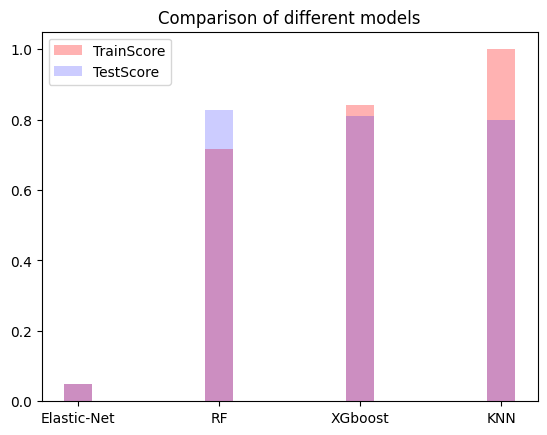

In [47]:
plt.bar(summary4.index,summary4['TrainScore'],width=0.2,color='r',alpha=0.3,label='TrainScore')
plt.bar(summary4.index,summary4['TestScore'],width=0.2,color='b',alpha=0.2,label='TestScore')
plt.title('Comparison of different models')
plt.legend()

In [34]:
summary5=pd.DataFrame([[train5_score_reg.mean(),test5_score_reg.mean()],[train_score_rf,test_score_rf],[train5_score_xgb,test5_score_xg],[train5_score_knn,test5_score_knn]],index=['Elastic-Net','RF','XGboost','KNN'],columns=['TrainScore','TestScore'])
summary5

,TrainScore,TestScore
Elastic-Net,0.283247,0.283336
RF,0.850375,0.940917
XGboost,0.996243,0.908773
KNN,1.000000,0.906819


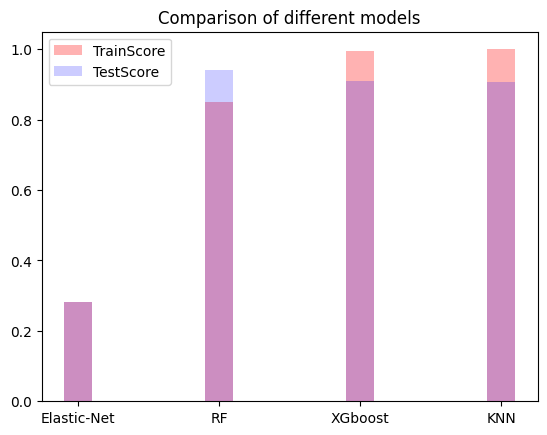

In [35]:
plt.bar(summary5.index,summary5['TrainScore'],width=0.2,color='r',alpha=0.3,label='TrainScore')
plt.bar(summary5.index,summary5['TestScore'],width=0.2,color='b',alpha=0.2,label='TestScore')
plt.title('Comparison of different models')
plt.legend()